In [173]:
# Importing required libraries

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [174]:
# Reading train and test csv files

train = pd.read_csv("train.csv", index_col="ID")
test = pd.read_csv("test.csv", index_col="ID")

In [175]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
ID,,,,,,,,,,
FDA15OUT049,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01OUT018,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15OUT049,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07OUT010,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19OUT013,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [176]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
ID,,,,,,,,,
FDW58OUT049,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
FDW14OUT017,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
NCN55OUT010,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
FDQ58OUT017,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
FDY38OUT027,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [177]:
train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [178]:
train_columns = train.columns[train.isna().any()].tolist()
test_columns = test.columns[test.isna().any()].tolist()

In [179]:
print(train_columns)
print(test_columns)

['Item_Weight', 'Outlet_Size']
['Item_Weight', 'Outlet_Size']


In [180]:
cleanup_nums={'Item_Fat_Content':{'Low Fat':0,'Regular':1,'LF': 2,'reg':3,'low fat':4},'Item_Type':{'Fruits and Vegetables':1,'Snack Foods':2
,'Household':3,'Frozen Foods':4,'Dairy':5,'Canned':6,'Baking Goods':7,'Health and Hygiene':8,'Soft Drinks':9,'Meat':10,'Breads':11,'Hard Drinks':12,
'Others':0,'Starchy Foods':13 ,'Breakfast':14 ,'Seafood':15 },'Outlet_Size':{'Medium':1,'Small':0,'High':2},'Outlet_Location_Type':{'Tier 3':2
,'Tier 2':1,'Tier 1':0},'Outlet_Type':{'Supermarket Type1':1,'Grocery Store':0,'Supermarket Type3':3,'Supermarket Type2':2}}

In [181]:
train.replace(cleanup_nums, inplace=True)
test.replace(cleanup_nums, inplace=True)

In [182]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
ID,,,,,,,,,
FDW58OUT049,20.750,0,0.007565,2,107.8622,1999,1.0,0,1
FDW14OUT017,8.300,3,0.038428,5,87.3198,2007,NaN,1,1
NCN55OUT010,14.600,0,0.099575,0,241.7538,1998,NaN,2,0
FDQ58OUT017,7.315,0,0.015388,2,155.0340,2007,NaN,1,1
FDY38OUT027,NaN,1,0.118599,5,234.2300,1985,1.0,2,3


In [183]:
test['Outlet_Size']=test['Outlet_Size'].ffill().bfill()
test['Item_Weight'].fillna(np.mean(test['Item_Weight']),inplace=True)

In [184]:
train['Outlet_Size']=train['Outlet_Size'].ffill().bfill()
train['Item_Weight'].fillna(np.mean(train['Item_Weight']),inplace=True)

In [185]:
test.columns[test.isna().any()].tolist()

[]

{'boxes': [<matplotlib.lines.Line2D at 0x2750fd390f0>],
 'caps': [<matplotlib.lines.Line2D at 0x2750fd39b00>,
 'fliers': [<matplotlib.lines.Line2D at 0x2750fbb07b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2750fbb0390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2750fd39240>,
  <matplotlib.lines.Line2D at 0x2750fd396d8>]}

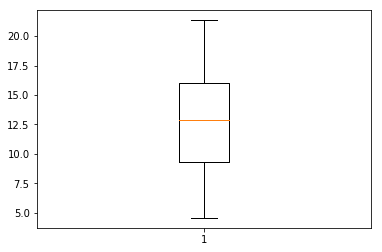

In [186]:
plt.boxplot(train['Item_Weight'])

{'boxes': [<matplotlib.lines.Line2D at 0x2750fc09908>],
 'caps': [<matplotlib.lines.Line2D at 0x2750fc10358>,
 'fliers': [<matplotlib.lines.Line2D at 0x2750fc10fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2750fc10ba8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2750fc09a58>,
  <matplotlib.lines.Line2D at 0x2750fc09ef0>]}

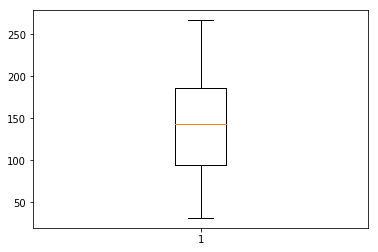

In [187]:
plt.boxplot(train['Item_MRP'])

In [188]:
x_train = train.drop(["Item_Fat_Content", "Item_Outlet_Sales"], axis=1)
y_train = train["Item_Outlet_Sales"]

In [189]:
test = test.drop("Item_Fat_Content", axis=1)

{'boxes': [<matplotlib.lines.Line2D at 0x2750fc6a6d8>],
 'caps': [<matplotlib.lines.Line2D at 0x2750fc72128>,
 'fliers': [<matplotlib.lines.Line2D at 0x2750fc72da0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2750fc72978>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2750fc6a828>,
  <matplotlib.lines.Line2D at 0x2750fc6acc0>]}

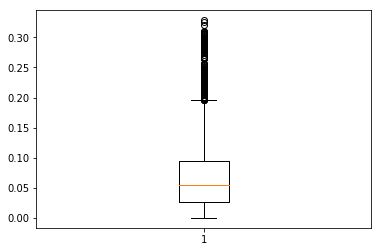

In [190]:
plt.boxplot(train['Item_Visibility'])

In [191]:
train.loc[train['Item_Visibility']>0.25,'Item_Visibility']=np.mean(train['Item_Visibility'])

{'boxes': [<matplotlib.lines.Line2D at 0x2750fd5e0b8>],
 'caps': [<matplotlib.lines.Line2D at 0x2750fd5eac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2750fd67780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2750fd67358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2750fd5e208>,
  <matplotlib.lines.Line2D at 0x2750fd5e6a0>]}

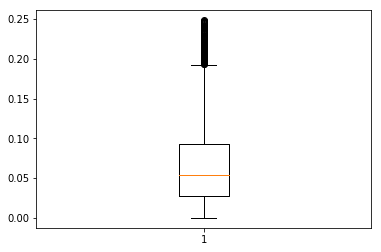

In [192]:
plt.boxplot(train['Item_Visibility'])

{'boxes': [<matplotlib.lines.Line2D at 0x2750fdbf390>],
 'caps': [<matplotlib.lines.Line2D at 0x2750fdbfda0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2750fdc6a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2750fdc6630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2750fdbf4e0>,
  <matplotlib.lines.Line2D at 0x2750fdbf978>]}

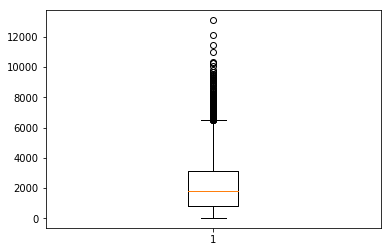

In [193]:
plt.boxplot(train['Item_Outlet_Sales'])

In [194]:
train.loc[train['Item_Outlet_Sales']>10000,'Item_Outlet_Sales']=np.mean(train['Item_Outlet_Sales'])

{'boxes': [<matplotlib.lines.Line2D at 0x2750fe1db38>],
 'caps': [<matplotlib.lines.Line2D at 0x2750fe25588>,
 'fliers': [<matplotlib.lines.Line2D at 0x2750fe2d240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2750fe25dd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2750fe1dc88>,
  <matplotlib.lines.Line2D at 0x2750fe25160>]}

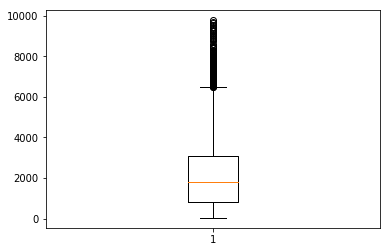

In [195]:
plt.boxplot(train['Item_Outlet_Sales'])

In [196]:
from sklearn import datasets, linear_model

In [197]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
pred = regr.predict(test)

In [198]:
regr.score(x_train, y_train)

0.4999729630809355

In [199]:
pred

array([1985.52964538, 1308.55261813, 2249.95629541, ..., 1730.11492567,
       3315.98847482, 1081.75898118])

In [200]:
result = {"ID":test.index, "Item_Outlet_Sales":pred}
df = pd.DataFrame(result)

In [201]:
df.to_csv("SampleSubmission.csv", index=False)